In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train.csv")
#test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
print(train_data.shape)

(891, 12)


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Master. Karl Thorsten",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Evaluate the missing Percentage of the data in the feature space. 
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = (round(train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending=False))
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', 'Percentage (%)'])
missing_data.head(5)

,Total,Percentage (%)
Cabin,687,77.0
Age,177,20.0
Embarked,2,0.0
Fare,0,0.0
Ticket,0,0.0


In [9]:
print("Average Fare: ", round(train_data['Fare'].mean(), 3))

Average Fare:  32.204


In [10]:
print("Average Traveller Age: ", round(train_data['Age'].mean()))

Average Traveller Age:  30


Text(0.5, 1.0, 'Survived or Not Survived')

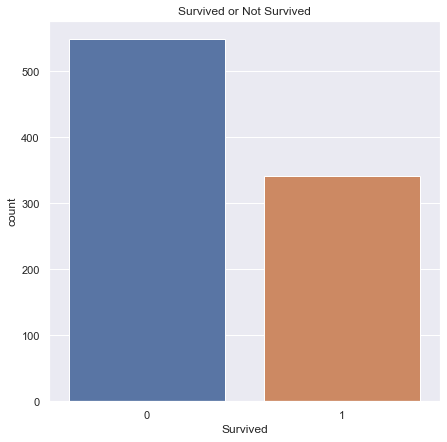

In [11]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(train_data['Survived'])
plt.title('Survived or Not Survived')

In [12]:
first_class_count= (train_data['Pclass'] == 1).sum()
second_class_count= (train_data['Pclass'] == 2).sum()
third_class_count= (train_data['Pclass'] == 3).sum()
print(" Number of Passangers in First Class: ", first_class_count)
print(" Number of Passangers in Second Class: ",second_class_count)
print(" Number of Passangers in Third Class: ", third_class_count)

 Number of Passangers in First Class:  216
 Number of Passangers in Second Class:  184
 Number of Passangers in Third Class:  491


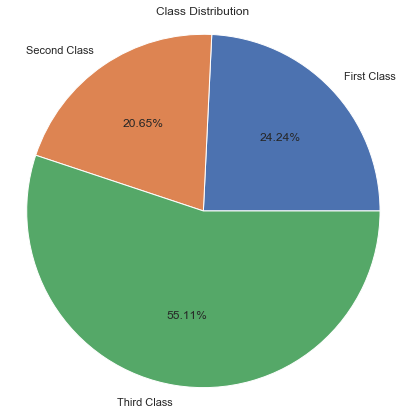

In [13]:
labels=['First Class', 'Second Class', 'Third Class']
sizes=[first_class_count, second_class_count, third_class_count]
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

Text(0.5, 1.0, 'Class based Survival Rate')

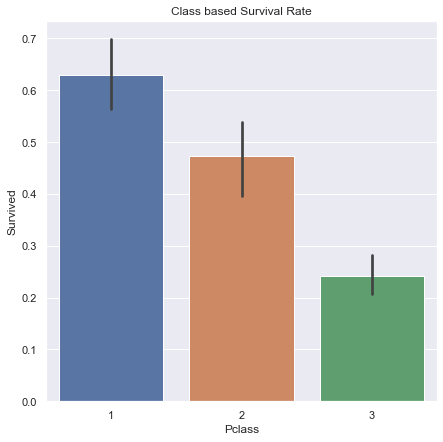

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Class based Survival Rate')

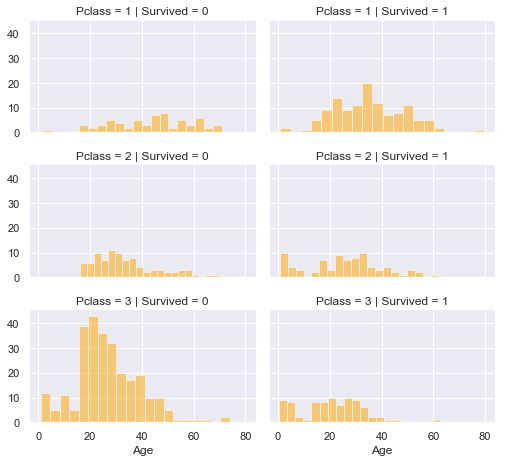

In [15]:
# Age based survival in each class of Pclass
grid_data = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid_data.map(plt.hist, 'Age', alpha=.5, bins=20, color='orange')
grid_data.add_legend()

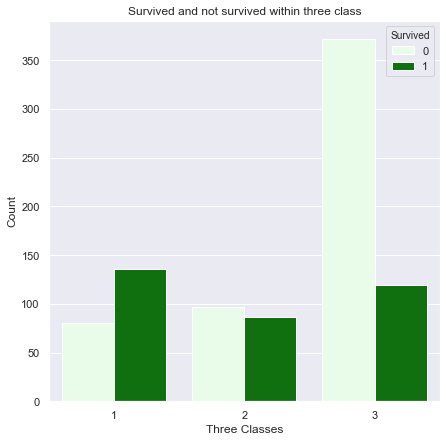

In [16]:
sns.countplot(train_data['Pclass'], hue=train_data['Survived'], color='green')
plt.title('Survived and not survived within three class')
plt.xlabel('Three Classes')
plt.ylabel('Count')
plt.show()

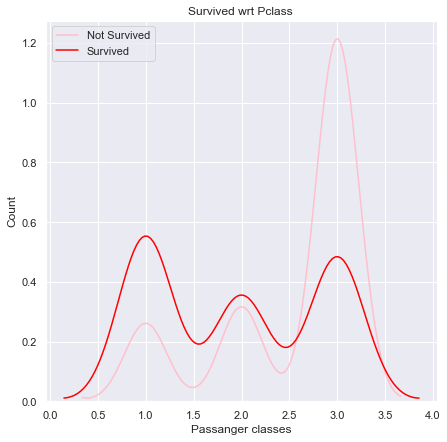

In [17]:
# Density estimation of survived/not survived in each passanger class (1,2, and 3)
est=sns.kdeplot(train_data.Pclass[train_data.Survived == 0], label='Not Survived', color='pink')
est=sns.kdeplot(train_data.Pclass[train_data.Survived == 1], label='Survived', color='red')
plt.title('Survived wrt Pclass ')
plt.xlabel('Passanger classes')
plt.ylabel('Count')
plt.show()

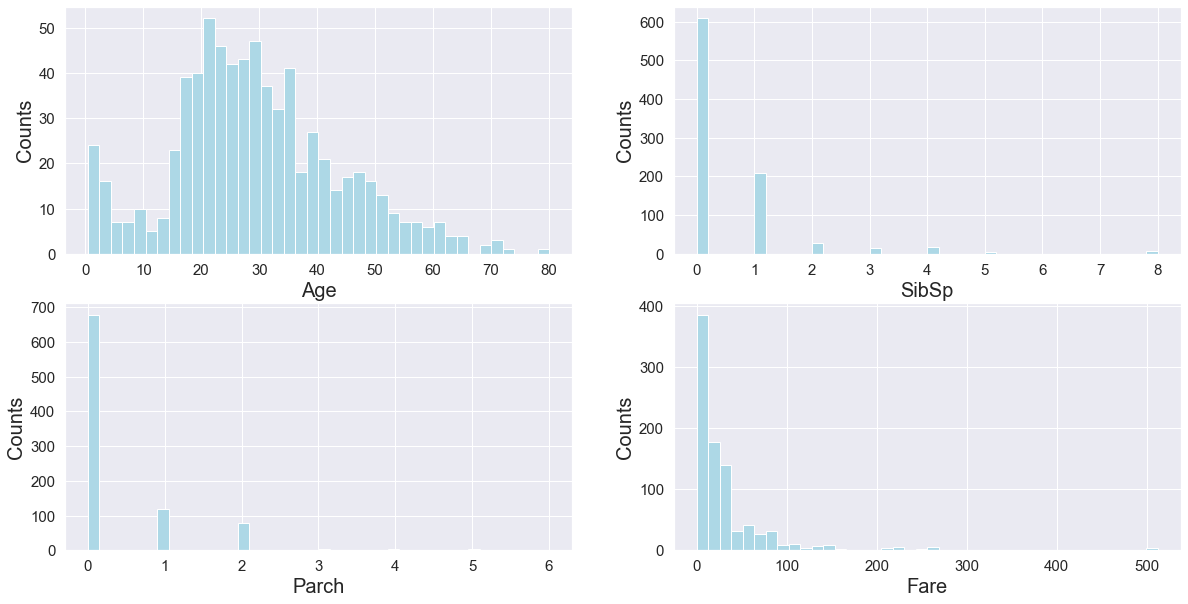

In [18]:
# Analysis the numrical values 
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(train_data[num_features[idx]].dropna(), bins=40, color='lightblue')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

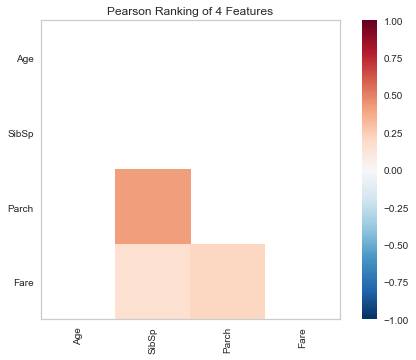

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
X = train_data[num_features].as_matrix()
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                
visualizer.transform(X)            
visualizer.poof()    

In [20]:
# Define function to plot bar chat for various feature set in the dataset
def Bar_Chart(features):
    survived=train_data[train_data['Survived']==1][features].value_counts()
    notsurvived=train_data[train_data['Survived']==0][features].value_counts()
    df=pd.DataFrame([survived, notsurvived])
    df.index = ['survived', 'notsurvived']
    df.plot(kind='bar', stacked=True, figsize=(11,6))

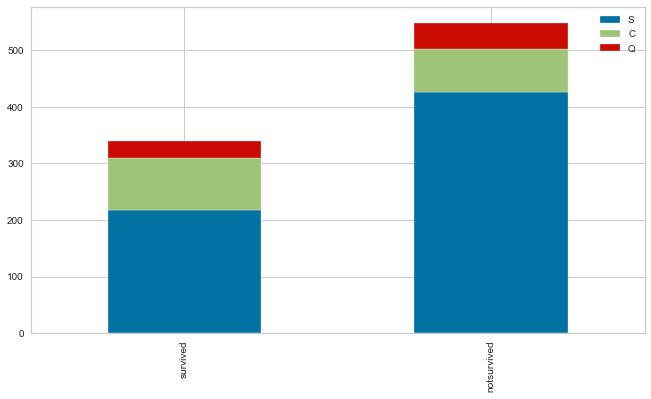

In [21]:
Bar_Chart('Embarked')

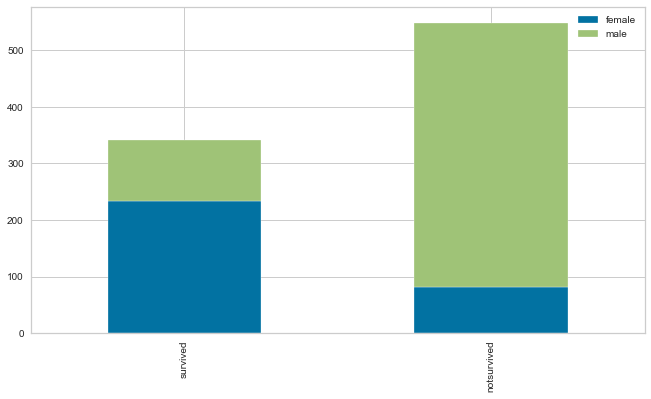

In [22]:
Bar_Chart('Sex')

Text(0.5, 1.0, 'Male')

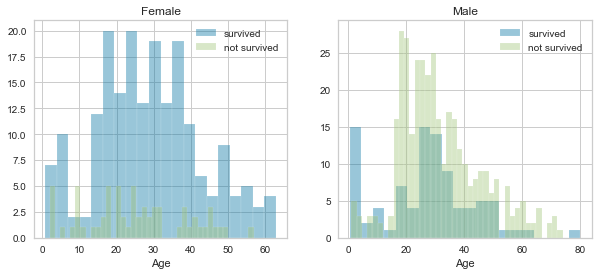

In [23]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = train_data[train_data['Sex']=='female']
male = train_data[train_data['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [24]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Treating Missing Values in the dataset 

In [25]:
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)
fill_na_median(train_data['Age'])
train_data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)
fill_na_most(train_data['Embarked'])
train_data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [27]:
def log_transformation(data):
    return data.apply(np.log1p)
train_data['Fare_log1p'] = log_transformation(train_data['Fare'])

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


Text(0, 0.5, 'Counts')

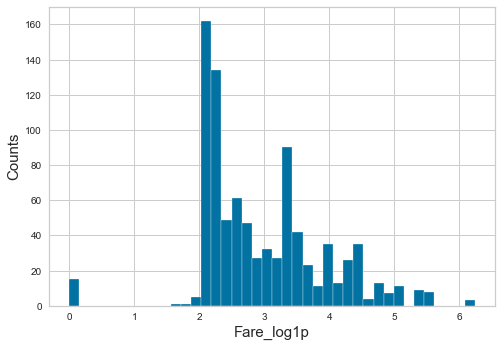

In [28]:
plt.hist(train_data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=15)
plt.ylabel('Counts', fontsize=15)

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_f = ['Pclass', 'Sex', "Embarked"]
train_data_cat = train_data[cat_f]
train_data_cat = train_data_cat.replace({'Pclass': {1: 'First', 2: 'Second', 3: 'Third'}})
train_data_cat_dummies = pd.get_dummies(train_data_cat)
train_data_cat_dummies.head()

,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [30]:
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
feature = pd.concat([train_data[features_model], train_data_cat_dummies], axis=1)
target= train_data.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 42,test_size=0.30)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
svm= SVC()
adaboost= AdaBoostClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier(random_state=42)

In [34]:
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [35]:
svm.fit(x_train, y_train)  
y_pred = svm.predict(x_test)  
acc_svm = round(svm.score(x_train, y_train) * 100, 2)

In [36]:
adaboost.fit(x_train, y_train)  
y_pred = adaboost.predict(x_test)  
acc_ada = round(adaboost.score(x_train, y_train) * 100, 2)

In [37]:
gnb.fit(x_train, y_train)  
y_pred = gnb.predict(x_test)  
acc_gnb = round(gnb.score(x_train, y_train) * 100, 2)


In [38]:
rf.fit(x_train, y_train)  
y_pred = rf.predict(x_test)  
acc_rf = round(rf.score(x_train, y_train) * 100, 2)

In [39]:
results = pd.DataFrame({
    'Model': ['KNN', 'Support Vector Machine', 
              'AdaBoost', 'Naive Bayes', 'Random Forest'],
    'Score': [acc_knn, acc_svm, acc_ada, acc_gnb, acc_rf]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
96.15,Random Forest
86.52,KNN
85.55,Support Vector Machine
84.11,AdaBoost
78.49,Naive Bayes


In [40]:
print (np.mean(cross_val_score(rf, x_train, y_train, cv=10)))

0.8073892729134664


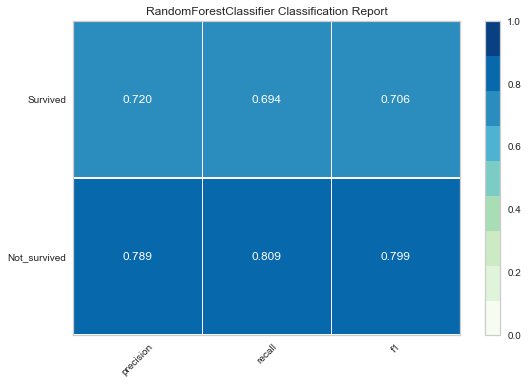

In [41]:
from yellowbrick.classifier import ClassificationReport
mu_viz = ClassificationReport(RandomForestClassifier(), cmap='GnBu')
mu_viz.fit(x_train, y_train)
mu_viz.score(x_test, y_test)
mu_viz.show()

In [44]:
# Save the model
from sklearn.externals import joblib 
joblib.dump(rf, 'Titanic_RandomForest.pkl')

['Titanic_RandomForest.pkl']